In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data.csv')


# Replace NA values with 0
df.fillna(0, inplace=True)

# Replace infinite values with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

# Check for NaN or infinite values




rows_to_remove = ["Total State (S)", "Total UT (S)", "Total All India"]
df_cleaned = df[~df['State/UT'].isin(rows_to_remove)]

# Reset index after removing rows (optional)
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv('Data_Updated.csv', index=False)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load the dataset
df = pd.read_csv('Data_Updated.csv')

# Select features and target
features = df[['Population(2015)', 'Rate(2015)', 'Population(2016)', 'Rate(2016)',
               'Population(2017)', 'Rate(2017)', 'Population(2018)', 'Rate(2018)',
               'Population(2019)', 'Rate(2019)', 'Population(2020)', 'Rate(2020)',
               'Population(2021)', 'Rate(2021)', '2015', '2016',
               '2017', '2018', '2019', '2020', '2021']]
target = df['2022']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.2196 - mae: 0.3328 - val_loss: 0.1961 - val_mae: 0.2717
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 0.1274 - mae: 0.2412 - val_loss: 0.1534 - val_mae: 0.2457
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - loss: 0.1447 - mae: 0.2423 - val_loss: 0.1192 - val_mae: 0.2256
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - loss: 0.1182 - mae: 0.2182 - val_loss: 0.0932 - val_mae: 0.2080
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 0.0886 - mae: 0.2001 - val_loss: 0.0730 - val_mae: 0.1917
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0525 - mae: 0.1495 - val_loss: 0.0568 - val_mae: 0.1767
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 0.0362 - mae: 0.1303 - val_loss: 0.0438 - val_mae: 0.1625
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0669 - mae: 0.1650 - val_loss: 0.0339 - val_mae: 0.1488
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.0384 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
 ANN - MSE: 1692793743.5440745, R²: 0.9664852619171143


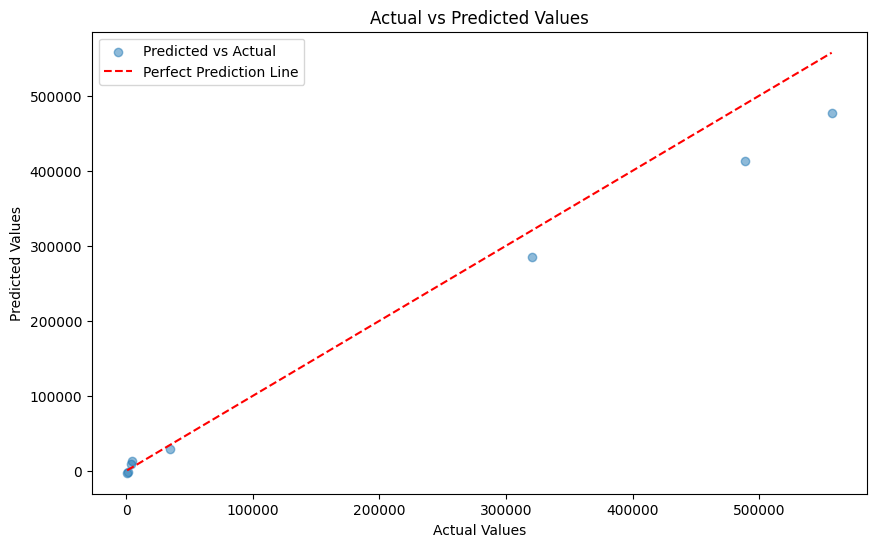

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define improved ANN model
model_ann_improved = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer
])

model_ann_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model_ann_improved.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate
y_pred_improved = model_ann_improved.predict(X_test_scaled)
y_pred_original_scale = target_scaler.inverse_transform(y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_original_scale)
r2_improved = r2_score(y_test, y_pred_original_scale)

print(f" ANN - MSE: {mse_improved}, R²: {r2_improved}")



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_original_scale, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.savefig('ann_actual_vs_predicted.png', format='png', dpi=300)
plt.show()




Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.0918 - mae: 0.1981 - val_loss: 0.0807 - val_mae: 0.1837
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step - loss: 0.0619 - mae: 0.1641 - val_loss: 0.0471 - val_mae: 0.1575
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0409 - mae: 0.1423 - val_loss: 0.0267 - val_mae: 0.1354
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0277 - mae: 0.1240 - val_loss: 0.0171 - val_mae: 0.1141
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0213 - mae: 0.1117 - val_loss: 0.0145 - val_mae: 0.1085
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0197 - mae: 0.1118 - val_loss: 0.0146 - val_mae: 0.1159
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0198 - mae: 0.1182 - val_loss: 0.0141 - val_mae: 0.1115
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0190 - mae: 0.1159 - val_loss: 0.0125 - val_mae: 0.1050
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0163 - mae: 0.1064 

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (8, 2, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Transformer - MSE: 469749274.2582456, R²: 0.9906997084617615


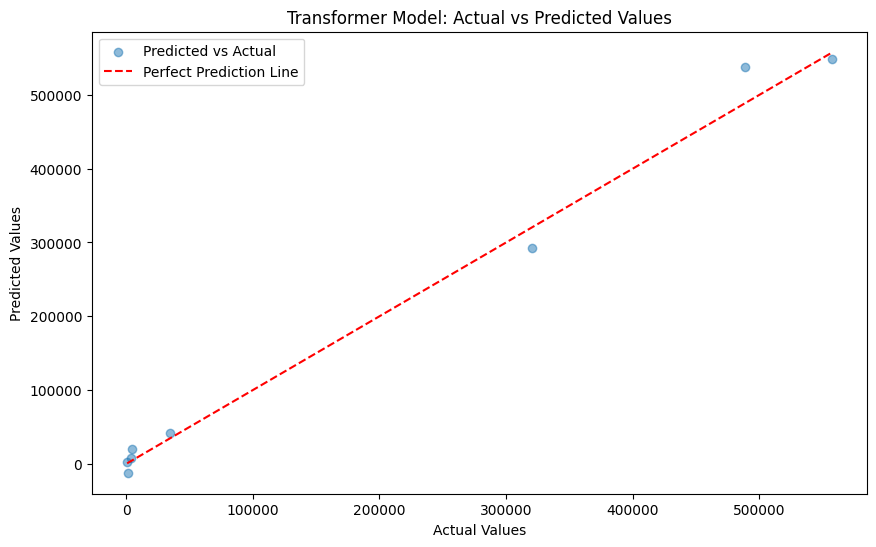

In [9]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

# Transformer model
def build_transformer_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    x = layers.Reshape((1, 64))(x)  # Reshape for transformer input
    x = layers.MultiHeadAttention(num_heads=2, key_dim=32)(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(1)(x)  # Regression output
    return Model(inputs, outputs)

# Compile and train
transformer_model = build_transformer_model(X_train_scaled.shape[1])
transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
transformer_model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate
y_pred_transformer = transformer_model.predict(X_test_scaled)
y_pred_original_scale = target_scaler.inverse_transform(y_pred_transformer)
mse_transformer = mean_squared_error(y_test, target_scaler.inverse_transform(y_pred_transformer))
r2_transformer = r2_score(y_test, target_scaler.inverse_transform(y_pred_transformer))

print(f"Transformer - MSE: {mse_transformer}, R²: {r2_transformer}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_original_scale, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Transformer Model: Actual vs Predicted Values')
plt.legend()
plt.savefig('Tranformer_actual_vs_predicted.png', format='png', dpi=300)
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 2s - 2s/step - loss: 0.1678 - mae: 0.2730 - val_loss: 0.1761 - val_mae: 0.2567
Epoch 2/100
1/1 - 0s - 123ms/step - loss: 0.1389 - mae: 0.2372 - val_loss: 0.1239 - val_mae: 0.2207
Epoch 3/100
1/1 - 0s - 117ms/step - loss: 0.1076 - mae: 0.2067 - val_loss: 0.0868 - val_mae: 0.1903
Epoch 4/100
1/1 - 0s - 68ms/step - loss: 0.0651 - mae: 0.1587 - val_loss: 0.0722 - val_mae: 0.1821
Epoch 5/100
1/1 - 0s - 87ms/step - loss: 0.0685 - mae: 0.1724 - val_loss: 0.0590 - val_mae: 0.1738
Epoch 6/100
1/1 - 0s - 98ms/step - loss: 0.0634 - mae: 0.1657 - val_loss: 0.0463 - val_mae: 0.1636
Epoch 7/100
1/1 - 0s - 63ms/step - loss: 0.0581 - mae: 0.1568 - val_loss: 0.0336 - val_mae: 0.1492
Epoch 8/100
1/1 - 0s - 66ms/step - loss: 0.0300 - mae: 0.1319 - val_loss: 0.0242 - val_mae: 0.1342
Epoch 9/100
1/1 - 0s - 73ms/step - loss: 0.0475 - mae: 0.1522 - val_loss: 0.0178 - val_mae: 0.1197
Epoch 10/100
1/1 - 0s - 66ms/step - loss: 0.0190 - mae: 0.1133 - val_loss: 0.0142 - val_mae: 0.1068
Epoch 11/100
1/1 - 0s

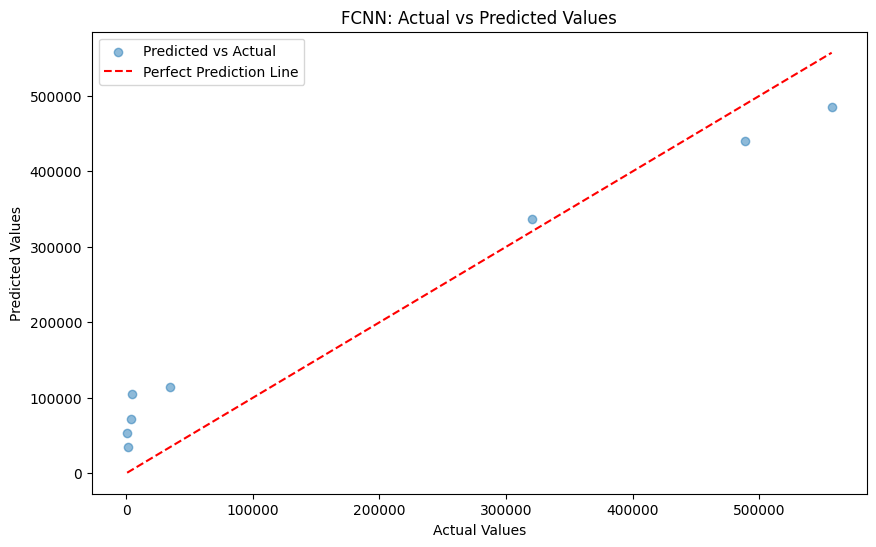

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scaling Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling Target Data
target_scaler = MinMaxScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Define Fully Connected Neural Network (FCNN) Model
fcnn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),  # First Hidden Layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Second Hidden Layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Third Hidden Layer
    Dense(16, activation='relu'),  # Fourth Hidden Layer
    Dense(1)  # Output Layer (linear activation for regression)
])

# Compile the model
fcnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
fcnn_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[early_stopping],
    verbose=2
)

# Predict using the trained model
y_pred_scaled = fcnn_model.predict(X_test_scaled)

# Inverse transform the predictions and the true values to get them back to original scale
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_test_original = target_scaler.inverse_transform(y_test_scaled)

# Evaluation Metrics
mse_fcnn = mean_squared_error(y_test_original, y_pred)
r2_fcnn = r2_score(y_test_original, y_pred)

print(f"FCNN - MSE: {mse_fcnn:.2f}, R²: {r2_fcnn:.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("FCNN: Actual vs Predicted Values")
plt.legend()
plt.savefig('fcnn_actual_vs_predicted.png', format='png', dpi=300)
plt.show()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.4006 - mae: 0.4487 - val_loss: 0.3424 - val_mae: 0.4061
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.3169 - mae: 0.3909 - val_loss: 0.2651 - val_mae: 0.3500
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.2463 - mae: 0.3356 - val_loss: 0.2007 - val_mae: 0.2965
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1877 - mae: 0.2833 - val_loss: 0.1480 - val_mae: 0.2486
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1401 - mae: 0.2400 - val_loss: 0.1055 - val_mae: 0.2105
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1023 - mae: 0.2020 - val_loss: 0.0721 - val_mae: 0.1797
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0731 - mae: 0.1691 - val_loss: 0.0469 - val_mae: 0.1504
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0516 - mae: 0.1421 - val_loss: 0.0289 - val_mae: 0.1227
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0365 - mae: 0.1226 - 

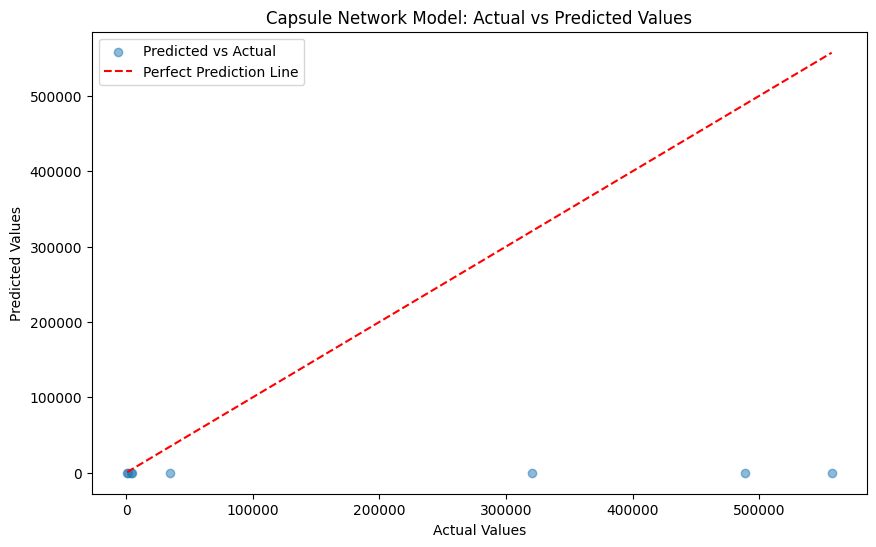

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsule, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsule = dim_capsule

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.num_capsules * self.dim_capsule),
                                      initializer='glorot_uniform', trainable=True)

    def call(self, inputs):
        u = tf.tensordot(inputs, self.kernel, axes=[-1, 0])
        u = tf.reshape(u, (-1, self.num_capsules, self.dim_capsule))
        return tf.norm(u, axis=-1)

# Capsule Network Model
def build_capsule_model(input_dim):
    inputs = layers.Input(shape=(input_dim,))
    x = layers.Dense(64, activation='relu')(inputs)
    caps = CapsuleLayer(num_capsules=10, dim_capsule=16)(x)
    outputs = layers.Dense(1)(caps)
    return models.Model(inputs, outputs)

# Compile and train
capsule_model = build_capsule_model(X_train_scaled.shape[1])
capsule_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
capsule_model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate
y_pred_capsule = capsule_model.predict(X_test_scaled)
mse_capsule = mean_squared_error(y_test, target_scaler.inverse_transform(y_pred_capsule))
r2_capsule = r2_score(y_test, target_scaler.inverse_transform(y_pred_capsule))

print(f"Capsule Network - MSE: {mse_capsule}, R²: {r2_capsule}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_capsule, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Capsule Network Model: Actual vs Predicted Values')
plt.savefig('capsule_network_actual_vs_predicted.png', format='png', dpi=300)
plt.legend()
plt.show()


Improved DBN - MSE: 8978580270.1636, R²: 0.8222378810448677


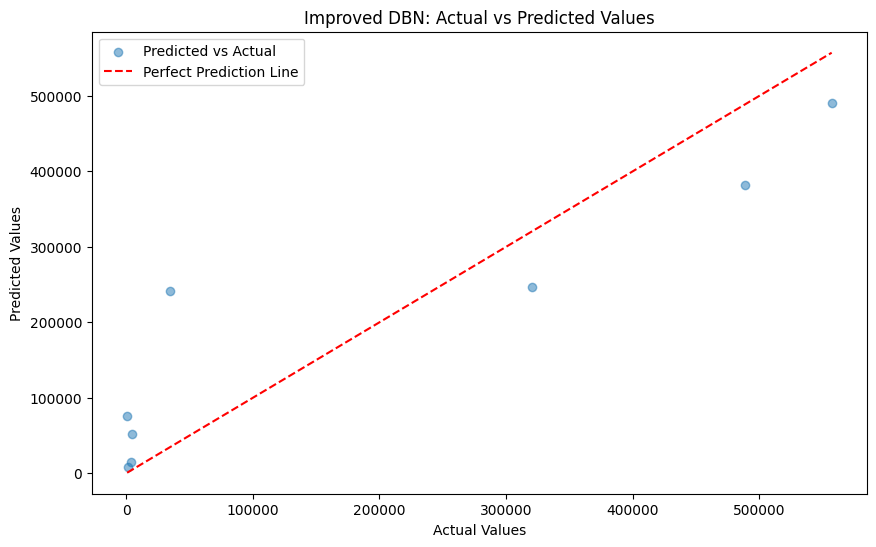

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define DBN with Random Forest
rbm = BernoulliRBM(n_components=50, learning_rate=0.01, n_iter=25)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

dbn_pipeline = Pipeline(steps=[('rbm', rbm), ('regressor', regressor)])
dbn_pipeline.fit(X_train_scaled, y_train)

# Evaluate
y_pred_dbn = dbn_pipeline.predict(X_test_scaled)
mse_dbn = mean_squared_error(y_test, y_pred_dbn)
r2_dbn = r2_score(y_test, y_pred_dbn)

print(f"Improved DBN - MSE: {mse_dbn}, R²: {r2_dbn}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dbn, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Improved DBN: Actual vs Predicted Values')
plt.legend()
plt.savefig('DBN_actual_vs_predicted.png', format='png', dpi=300)
plt.show()


ELM - MSE: 1328219945.0502129, R²: 0.9737032821708801


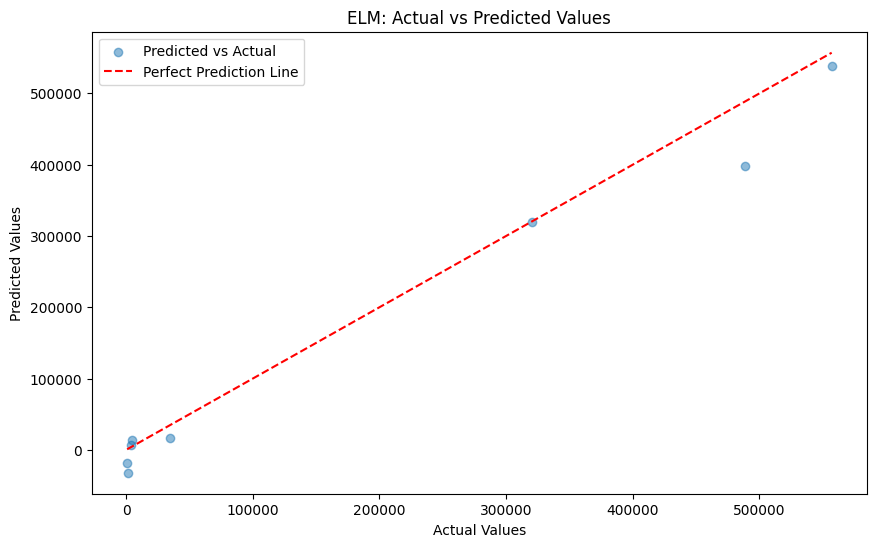

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import numpy as np

# Define ELM Model
class ExtremeLearningMachine:
    def __init__(self, input_dim, hidden_neurons):
        self.input_dim = input_dim
        self.hidden_neurons = hidden_neurons
        self.hidden_weights = np.random.rand(self.input_dim, self.hidden_neurons) * 2 - 1  # Random weights
        self.biases = np.random.rand(self.hidden_neurons) * 2 - 1
        self.regressor = Ridge(alpha=1.0)

    def fit(self, X, y):
        H = self._hidden_layer_output(X)
        self.regressor.fit(H, y)

    def predict(self, X):
        H = self._hidden_layer_output(X)
        return self.regressor.predict(H)

    def _hidden_layer_output(self, X):
        return np.tanh(np.dot(X, self.hidden_weights) + self.biases)  # Activation function

# Initialize and train ELM
elm = ExtremeLearningMachine(input_dim=X_train_scaled.shape[1], hidden_neurons=100)
elm.fit(X_train_scaled, y_train)

# Evaluate
y_pred_elm = elm.predict(X_test_scaled)
mse_elm = mean_squared_error(y_test, y_pred_elm)
r2_elm = r2_score(y_test, y_pred_elm)

print(f"ELM - MSE: {mse_elm}, R²: {r2_elm}")



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elm, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ELM: Actual vs Predicted Values')
plt.legend()
plt.savefig('elm_actual_vs_predicted.png', format='png', dpi=300)
plt.show()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.2980 - mae: 0.3751 - val_loss: 0.1125 - val_mae: 0.2458
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - loss: 0.1667 - mae: 0.2816 - val_loss: 0.0732 - val_mae: 0.2371
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.1000 - mae: 0.2192 - val_loss: 0.0661 - val_mae: 0.2217
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.0729 - mae: 0.1841 - val_loss: 0.0580 - val_mae: 0.1929
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 0.0608 - mae: 0.1803 - val_loss: 0.0392 - val_mae: 0.1684
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 0.0485 - mae: 0.1698 - val_loss: 0.0179 - val_mae: 0.1220
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.0328 - mae: 0.1448 - val_loss: 0.0059 - val_mae: 0.0691
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0174 - mae: 0.1060 - val_loss: 0.0113 - val_mae: 0.0664
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - loss: 0.0079 - mae: 0.0

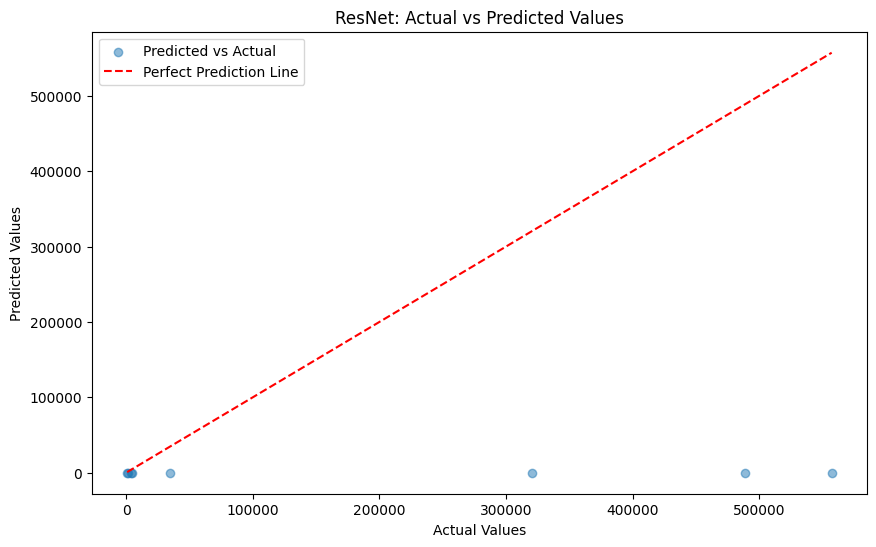

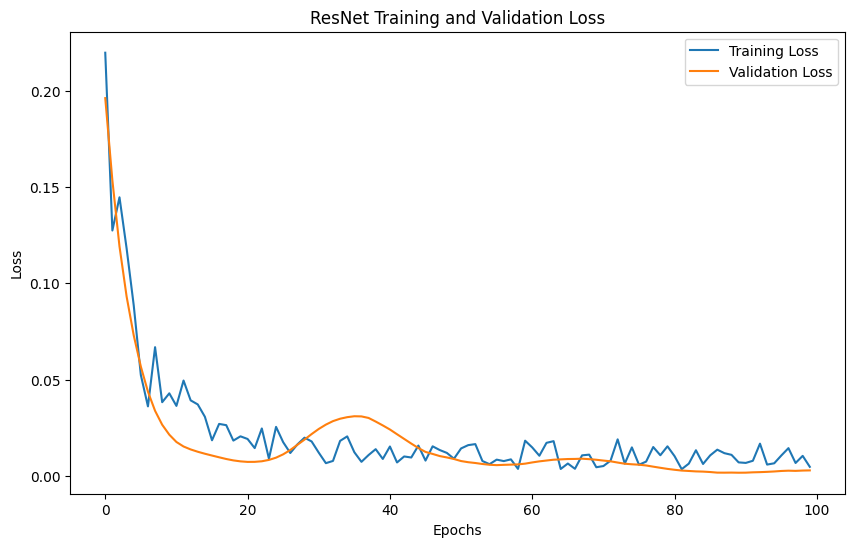

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add

# Define Residual Block
def residual_block(x, units):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = Dense(units)(x)
    x = Add()([x, shortcut])  # Residual connection
    return x

# Build ResNet Model
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = residual_block(x, 64)
x = residual_block(x, 64)
outputs = Dense(1)(x)

resnet_model = Model(inputs, outputs)
resnet_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
resnet_model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

# Evaluate
y_pred_resnet = resnet_model.predict(X_test_scaled)
y_pred_resnet_original_scale = target_scaler.inverse_transform(y_pred_resnet)
mse_resnet = mean_squared_error(y_test, target_scaler.inverse_transform(y_pred_resnet))
r2_resnet = r2_score(y_test, target_scaler.inverse_transform(y_pred_resnet))

print(f"ResNet - MSE: {mse_resnet}, R²: {r2_resnet}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_resnet, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ResNet: Actual vs Predicted Values')
plt.legend()
plt.savefig('dbr_actual_vs_predicted.png', format='png', dpi=300)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet Training and Validation Loss')
plt.legend()
plt.savefig('dbr_training_vs_validation.png', format='png', dpi=300)
plt.show()


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1785 - val_loss: 0.1937
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - loss: 0.1778 - val_loss: 0.1931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.1771 - val_loss: 0.1926
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - loss: 0.1765 - val_loss: 0.1921
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1759 - val_loss: 0.1916
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.1754 - val_loss: 0.1911
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.1749 - val_loss: 0.1907
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1744 - val_loss: 0.1903
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.1739 - val_loss: 0.1899
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1735 - val_loss: 0.1896
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.1731 - val_loss: 0.1892
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.1727 -

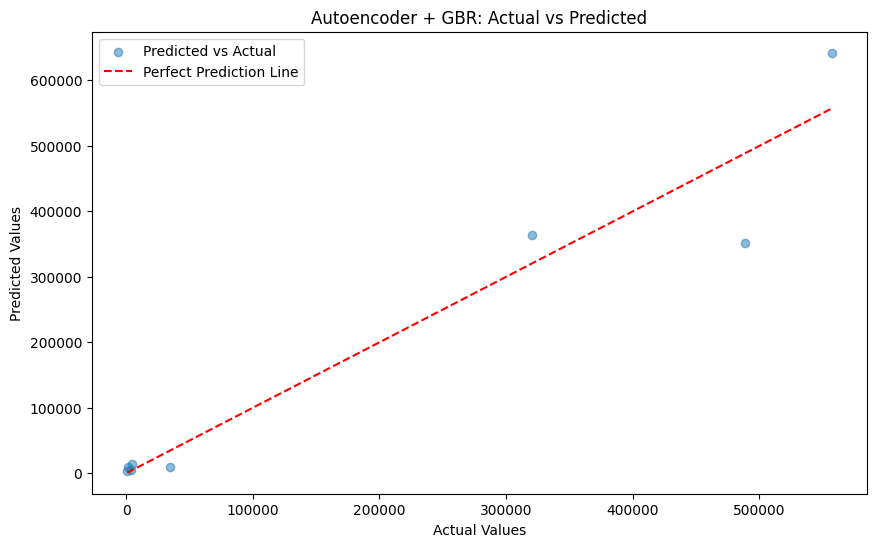

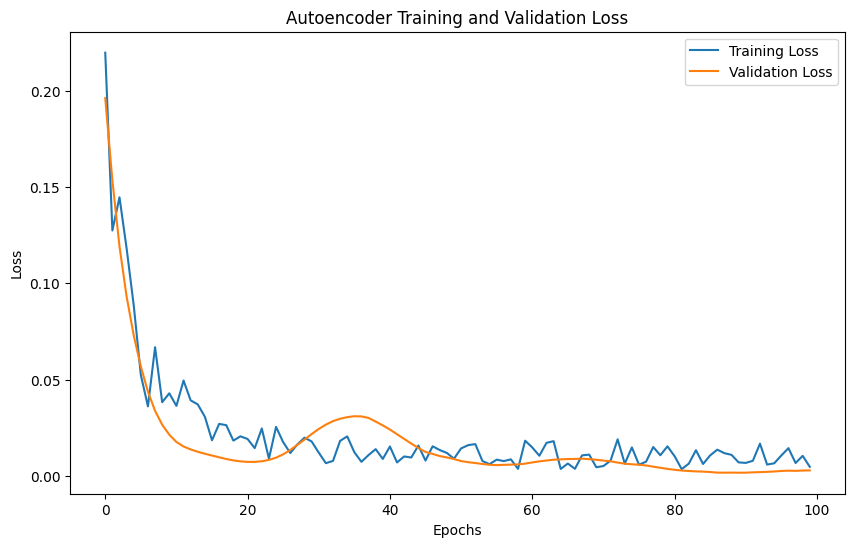

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Step 1: Build and train the Autoencoder
input_dim = X_train_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_scaled, X_test_scaled))

# Step 2: Extract latent features
encoder = Model(inputs=input_layer, outputs=encoded)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Step 3: Train Gradient Boosting Regressor on latent features
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_encoded, y_train)

# Step 4: Evaluate
y_pred_gbr = gbr.predict(X_test_encoded)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Autoencoder + GBR - MSE: {mse_gbr}, R²: {r2_gbr}")



plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Autoencoder + GBR: Actual vs Predicted')
plt.legend()
plt.savefig('autoencoder+GBR_actual_vs_predicted.png', format='png', dpi=300)
plt.show()

# Plot Training and Validation Loss of Autoencoder
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training and Validation Loss')
plt.legend()
plt.savefig('autoencoder+GBR_training_vs_validation.png', format='png', dpi=300)
plt.show()
